Attempt 2.1

Starting with outlineing the needed functions.

In [70]:
def complete_graph_adjacency_list(k):
    adjacency_list = {}
    for i in range(k):
        neighbors = [j for j in range(k) if j != i]
        adjacency_list[i] = neighbors
    return adjacency_list

k = 8
adjacency_list = complete_graph_adjacency_list(k)
print(adjacency_list)

{0: [1, 2, 3, 4, 5, 6, 7], 1: [0, 2, 3, 4, 5, 6, 7], 2: [0, 1, 3, 4, 5, 6, 7], 3: [0, 1, 2, 4, 5, 6, 7], 4: [0, 1, 2, 3, 5, 6, 7], 5: [0, 1, 2, 3, 4, 6, 7], 6: [0, 1, 2, 3, 4, 5, 7], 7: [0, 1, 2, 3, 4, 5, 6]}


In [73]:
import networkx as nx

def findOrderedPairs(adj_list):
    pairs = []
    for i in adj_list:
        for j in adj_list[i]:
            pairs.append((i,j))
    return pairs

orderedPairs = findOrderedPairs(adjacency_list)

def countFaces(ord_pairs, adj_list):
    faces = []
    while ord_pairs != []:
        i = ord_pairs.pop(0)
        face = [i]
        next_edge = None
        while next_edge != face[0]:
            index = adj_list[i[1]].index(i[0])
            next_vertex = adj_list[i[1]][(index +1)%(len(adj_list[i[1]]))]
            next_edge = (i[1], next_vertex)
            if next_edge != face[0]:
                face.append(next_edge)
                ord_pairs.remove(next_edge)
                i = next_edge
        faces.append(face)
    print(faces)
    return len(faces)

V = len(adjacency_list)
E = sum([len(adjacency_list[i]) for i in range(V)])/2
F = countFaces(orderedPairs, adjacency_list)

genus = int((2 - (V - E + F)) / 2)
print(V, E, F)
print(genus)

[[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 0)], [(0, 2), (2, 1), (1, 3), (3, 2), (2, 4), (4, 3), (3, 5), (5, 4), (4, 6), (6, 5), (5, 7), (7, 6), (6, 0), (0, 7), (7, 1), (1, 0)], [(0, 3), (3, 1), (1, 4), (4, 2), (2, 5), (5, 3), (3, 6), (6, 4), (4, 7), (7, 5), (5, 0), (0, 6), (6, 1), (1, 7), (7, 2), (2, 0)], [(0, 4), (4, 1), (1, 5), (5, 2), (2, 6), (6, 3), (3, 7), (7, 4), (4, 0), (0, 5), (5, 1), (1, 6), (6, 2), (2, 7), (7, 3), (3, 0)]]
8 28.0 4
9


K Graph Generator

In [123]:
def complete_graph_adjacency_list(k):
    adjacency_list = {}
    for i in range(k):
        neighbors = [j for j in range(k) if j != i]
        adjacency_list[i] = neighbors
    return adjacency_list

k = 8
adjacency_list = complete_graph_adjacency_list(k)
print(adjacency_list)

{0: [1, 2, 3, 4, 5, 6, 7], 1: [0, 2, 3, 4, 5, 6, 7], 2: [0, 1, 3, 4, 5, 6, 7], 3: [0, 1, 2, 4, 5, 6, 7], 4: [0, 1, 2, 3, 5, 6, 7], 5: [0, 1, 2, 3, 4, 6, 7], 6: [0, 1, 2, 3, 4, 5, 7], 7: [0, 1, 2, 3, 4, 5, 6]}


Main

In [45]:
import numpy as np
import mlrose_hiive as mlrose
import networkx as nx
import matplotlib.pyplot as plt
import GraphGenusFitness

# problem = GraphGenusOpt(length=len(adjacency_list), fitness_fn=GraphGenusFitness(adjacency_list), maximize=False, max_val=len(adjacency_list))

# Choose and configure the optimization algorithm
#schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)

#nit_state = adjacency_list

# Run simulated annealing
#best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 10, max_iters = 1000, init_state = init_state, random_state = 1)

#print(best_state)
#print(best_fitness)
fitness = GraphGenusFitness
state = adjacency_list
fitness.evaluate(state)


AttributeError: module 'GraphGenusFitness' has no attribute 'evaluate'

In [82]:
import numpy as np
import mlrose_hiive as mlrose
import networkx as nx
import matplotlib.pyplot as plt
from GraphGenusFitness import GraphGenusFitness
from GraphGenusOpt import GraphGenusOpt

# Example adjacency list
adjacency_list = {
    0: [1, 2, 3],
    1: [0, 2],
    2: [0, 1, 3],
    3: [0, 2]
}

# Create the fitness function object
fitness = GraphGenusFitness(adjacency_list)

# Create the optimization problem object
problem = GraphGenusOpt(length=len(adjacency_list), fitness_fn=fitness, maximize=False, max_val=len(adjacency_list))

# Choose and configure the optimization algorithm
schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)

# Run simulated annealing
best_state, best_fitness = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=10, max_iters=1000, random_state=1)

print(best_state)
print(best_fitness)


AttributeError: 'GraphGenusOpt' object has no attribute 'reset'

Visualization Functions

In [74]:
import numpy as np
import mlrose_hiive as mlrose
import networkx as nx
import matplotlib.pyplot as plt

class GraphGenusFitness:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def evaluate(self, state):
        def findOrderedPairs(adj_list):
            pairs = []
            for i in adj_list:
                for j in adj_list[i]:
                    pairs.append((i,j))
            return pairs

        def countFaces(ord_pairs, adj_list):
            faces = []
            while ord_pairs != []:
                i = ord_pairs.pop(0)
                face = [i]
                next_edge = None
                while next_edge != face[0]:
                    index = adj_list[i[1]].index(i[0])
                    next_vertex = adj_list[i[1]][(index +1)%(len(adj_list[i[1]]))]
                    next_edge = (i[1], next_vertex)
                    if next_edge != face[0]:
                        face.append(next_edge)
                        ord_pairs.remove(next_edge)
                        i = next_edge
                faces.append(face)
            return len(faces)
        
        orderedPairs = findOrderedPairs(adjacency_list)

        V = len(adjacency_list)
        E = sum([len(adjacency_list[i]) for i in range(V)])/2
        F = countFaces(orderedPairs, adjacency_list)

        genus = int((2 - (V - E + F)) / 2)
        return genus

    def get_prob_type(self):
        return 'discrete'


problem = mlrose.DiscreteOpt(length=len(adjacency_list), fitness_fn=GraphGenusFitness(adjacency_list),
                             maximize=False, max_val=len(adjacency_list))

# Choose and configure the optimization algorithm
schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)

init_state = adjacency_list

# Run simulated annealing
best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 10, max_iters = 1000, init_state = init_state, random_state = 1)

print(best_state)
print(best_fitness)



IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
def draw_graph(adjacency_list, title="Graph", state=None):
    G = nx.Graph()
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    pos = nx.spring_layout(G)
    node_colors = state if state is not None else 'blue'
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.jet)
    plt.title(title)
    plt.show()

def draw_fitness_curve(decoded_data):
    iterations = [data[0] for data in decoded_data]
    fitness_values = [data[1] for data in decoded_data]
    plt.plot(iterations, fitness_values)
    plt.ylabel('Genus Number')
    plt.xlabel('Iteration')
    plt.title('Fitness Curve')
    plt.show()

# Draw initial graph
draw_graph(adjacency_list, title="Initial Graph")

# Draw final graph
draw_graph(final_adjacency_list, title="Final Graph", state=best_state)

# Draw the fitness curve
draw_fitness_curve(decoded_data)

In [156]:
import numpy as np
import mlrose_hiive as mlrose
from mlrose_hiive.opt_probs.discrete_opt import DiscreteOpt

class GraphGenusOpt(DiscreteOpt):
    def __init__(self, fitness_fn, maximize=False, max_val=2):
        num_edges = sum(len(v) for v in fitness_fn.adjacency_list.values()) // 2
        super().__init__(length=num_edges, fitness_fn=fitness_fn, maximize=maximize, max_val=max_val)
        self.adj_list = fitness_fn.adjacency_list  # Store adjacency list

    def reset(self):
        self.state = self.random()
        self.fitness = self.eval_fitness(self.state)
        self.fevals = {}
        self.fitness_evaluations = 0
        self.current_iteration = 0

    def random(self):
        state = []
        for vertex in self.adj_list:
            for neighbor in self.adj_list[vertex]:
                if (neighbor, vertex) not in state:  # Ensure no duplicate edges
                    state.append((vertex, neighbor))
        np.random.shuffle(state)  # Shuffle the connections
        return state

    def random_neighbor(self):
        """Return random neighbor of current state vector.

        Returns
        -------
        neighbor: array
            State vector of random neighbor.
        """
        neighbor = np.copy(self.state)
        i = np.random.randint(0, len(self.state))

        if self.max_val == 2:
            neighbor[i] = np.abs(neighbor[i] - 1)

        else:
            vals = list(np.arange(self.max_val))
            vals.remove(neighbor[i][1])  # Corrected indexing
            neighbor[i][1] = vals[np.random.randint(0, self.max_val - 1)]  # Corrected indexing

        return neighbor

    def find_neighbors(self, state):
        neighbors = []
        for i in range(len(state)):
            for j in range(i + 1, len(state)):
                neighbor = state.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                neighbors.append(neighbor)
        return neighbors

    def eval_fitness(self, state):
        def findOrderedPairs(adj_list):
            pairs = []
            for i in adj_list:
                for j in adj_list[i]:
                    if (j, i) not in pairs:
                        pairs.append((i, j))
            return pairs

        def countFaces(ord_pairs, adj_list):
            visited_edges = set()
            faces = []
            while ord_pairs:
                i = ord_pairs.pop(0)
                face = [i]
                next_edge = None
                while next_edge != face[0]:
                    index = adj_list[i[1]].index(i[0])
                    next_vertex = adj_list[i[1]][(index + 1) % len(adj_list[i[1]])]
                    next_edge = (i[1], next_vertex)
                    if next_edge != face[0]:
                        face.append(next_edge)
                        visited_edges.add((i[0], i[1]))
                        visited_edges.add((i[1], next_vertex))
                        if next_edge in ord_pairs:
                            ord_pairs.remove(next_edge)
                        else:
                            break
                        i = next_edge
                faces.append(face)
            return len(faces)

        orderedPairs = findOrderedPairs(self.adj_list)

        V = len(self.adj_list)
        E = sum([len(self.adj_list[i]) for i in self.adj_list]) // 2
        F = countFaces(orderedPairs, self.adj_list)

        genus = int((2 - (V - E + F)) / 2)
        return -1 * genus  # Adjust fitness for maximization/minimization

    def get_prob_type(self):
        return 'discrete'
    
def complete_graph_adjacency_list(k):
    adjacency_list = {}
    for i in range(k):
        neighbors = [j for j in range(k) if j != i]
        adjacency_list[i] = neighbors
    return adjacency_list

k = 5  # Update the number of vertices
adjacency_list = complete_graph_adjacency_list(k)
print(adjacency_list)

# Define a fitness function class
class GraphGenusFitness:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def evaluate(self, state):
        return state

    def get_prob_type(self):
        return 'discrete'

# Create the fitness function object
fitness = GraphGenusFitness(adjacency_list)

# Create the optimization problem object
problem = GraphGenusOpt(fitness_fn=fitness, maximize=False, max_val=len(adjacency_list))

# Choose and configure the optimization algorithm
schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)

# Generate the initial state
init_state = problem.random()

# Ensure init_state length matches problem length
assert len(init_state) == problem.get_length(), f"init_state length {len(init_state)} does not match problem length {problem.get_length()}"

# Run simulated annealing with the initial state
optimized_state = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=10, max_iters=1000, init_state=init_state, random_state=1)

print("Optimized State:", optimized_state[0])  # Corrected unpacking
print("Optimized Fitness:", problem.eval_fitness(optimized_state[0]))  # Evaluate the fitness of the optimized state


{0: [1, 2, 3, 4], 1: [0, 2, 3, 4], 2: [0, 1, 3, 4], 3: [0, 1, 2, 4], 4: [0, 1, 2, 3]}
Optimized State: [[1 4]
 [1 0]
 [0 0]
 [2 0]
 [0 1]
 [1 1]
 [2 0]
 [0 0]
 [3 1]
 [0 2]]
Optimized Fitness: 0


In [126]:
import numpy as np
import mlrose_hiive as mlrose
import networkx as nx
import matplotlib.pyplot as plt

class GraphGenusFitness:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def evaluate(self, state):
        def findOrderedPairs(adj_list):
            pairs = []
            for i in adj_list:
                for j in adj_list[i]:
                    pairs.append((i,j))
            return pairs

        def countFaces(ord_pairs, adj_list):
            faces = []
            while ord_pairs != []:
                i = ord_pairs.pop(0)
                face = [i]
                next_edge = None
                while next_edge != face[0]:
                    index = adj_list[i[1]].index(i[0])
                    next_vertex = adj_list[i[1]][(index +1)%(len(adj_list[i[1]]))]
                    next_edge = (i[1], next_vertex)
                    if next_edge != face[0]:
                        face.append(next_edge)
                        ord_pairs.remove(next_edge)
                        i = next_edge
                faces.append(face)
            return len(faces)
        
        orderedPairs = findOrderedPairs(adjacency_list)

        V = len(adjacency_list)
        E = sum([len(adjacency_list[i]) for i in range(V)])/2
        F = countFaces(orderedPairs, adjacency_list)

        genus = int((2 - (V - E + F)) / 2)
        return genus

    def get_prob_type(self):
        return 'discrete'


problem = mlrose.DiscreteOpt(length=len(adjacency_list), fitness_fn=GraphGenusFitness(adjacency_list),
                             maximize=False, max_val=len(adjacency_list))

# Choose and configure the optimization algorithm
schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)

init_state = adjacency_list

# Run simulated annealing
best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 10, max_iters = 1000, init_state = init_state, random_state = 1)

print(best_state)
print(best_fitness)



IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

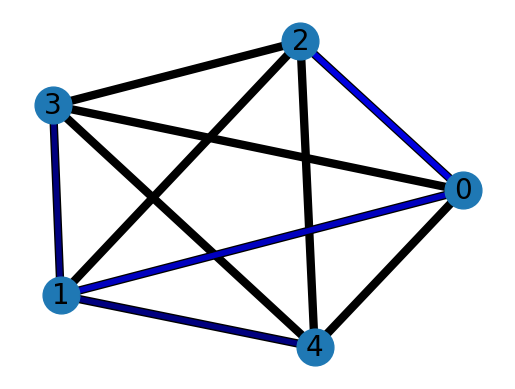

In [158]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(adj_list, optimized_state):
    G = nx.Graph()
    for vertex, neighbors in adj_list.items():
        for neighbor in neighbors:
            G.add_edge(vertex, neighbor)

    pos = nx.spring_layout(G)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, width=6)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

    # customized edges
    for edge in optimized_state:
        nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], width=4, edge_color='b', alpha=0.5)

    plt.axis("off")
    plt.show()

# Draw the graph
draw_graph(adjacency_list, optimized_state[0])
